# IIC-3641 GML UC

- Versiones de librerías, python 3.10.2

- networkx 2.6.2

## Vamos a crear una red clásica conocida como 'Karate-club'

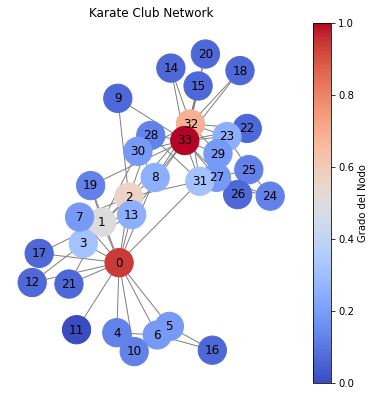

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.karate_club_graph()
node_degrees = dict(G.degree())
degrees = np.array(list(node_degrees.values()))
min_degree = degrees.min()
max_degree = degrees.max()

normalized_degrees = (degrees - min_degree) / (max_degree - min_degree)

colors = plt.cm.coolwarm(normalized_degrees)


pos = nx.spring_layout(G)  # Posiciones de los nodos

plt.figure(figsize=(5, 5))
nx.draw(G, pos, node_color=colors, with_labels=True, node_size=800, cmap=plt.cm.coolwarm, edge_color='gray')
plt.title("Karate Club Network")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")
plt.show()



## Obtenemos la distribución de grado

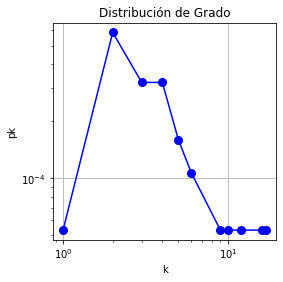

In [2]:
degree_counts = {}
for degree in degrees:
    if degree in degree_counts:
        degree_counts[degree] += 1
    else:
        degree_counts[degree] = 1

sorted_degrees = sorted(degree_counts.items())

x, y = zip(*sorted_degrees)
p = [n / 18772 for n in y]


plt.figure(figsize=(4, 4))
plt.plot(x, p, 'bo-', markersize=8)
plt.xscale('log')
plt.yscale('log')
plt.title('Distribución de Grado')
plt.xlabel('k')
plt.ylabel('pk')

plt.grid(True)
plt.show()

## Dos formas de medir cuan cerca está una red de un fenómeno small-world:

1. Medir el coeficiente $\sigma$, esto es, comparar el clustering promedio y la distancia promedio de la red con una Erdös-Rényi con el mismo $<k>$ que la red:

$ \sigma = \frac{\frac{C}{C_r}}{\frac{<d>}{<d>_r}}. $

Notar que si $\sigma > 1$, la red cumple con la propiedad small world.


In [3]:
nx.sigma(G, 5, 5)

1.0751010647383703

2. Medir la variable $w$, comparando la red con un lattice, es decir, que tan cerca esta de una red altamente clusterizable (super-estructurada):

$ w = \frac{<d>_r}{<d>} - \frac{C}{C_l}, $

donde $<d>$ y $C$ son la distancia promedio y el coeficiente de clustering promedio de la red, $C_l$ es el coeficiente promedio del lattice con el mismo $N$ y $<k>$ que la red y $<d>$ es la distancia promedio de una red Erdös-Rényi con el mismo $<k>$ que la red. Valores negativos indican que la red es similar a un lattice. Valores positivos indican que la red es cercana a un Erdös-Rényi. Valores cercanos a 0 indican la presencia de small-world en la red.

In [4]:
nx.omega(G, 5, 5)

-0.06809770540340487

# ¿Qué es una red Erdös-Rényi equivalente a mi red?

In [5]:
G_r = nx.random_reference(G)

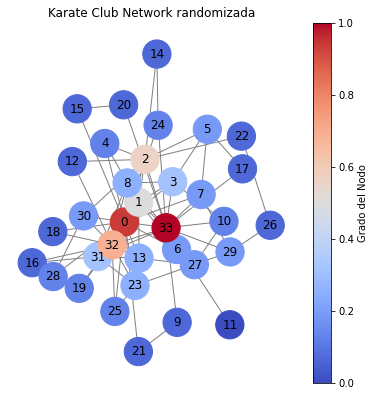

In [6]:
node_degrees = dict(G_r.degree())
degrees = np.array(list(node_degrees.values()))
min_degree = degrees.min()
max_degree = degrees.max()

normalized_degrees = (degrees - min_degree) / (max_degree - min_degree)

colors = plt.cm.coolwarm(normalized_degrees)


pos = nx.spring_layout(G_r)  # Posiciones de los nodos

plt.figure(figsize=(5, 5))
nx.draw(G_r, pos, node_color=colors, with_labels=True, node_size=800, cmap=plt.cm.coolwarm, edge_color='gray')
plt.title("Karate Club Network randomizada")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")
plt.show()

# ¿Qué es una red lattilizada equivalente a mi red?

In [8]:
G_l = nx.lattice_reference(G)

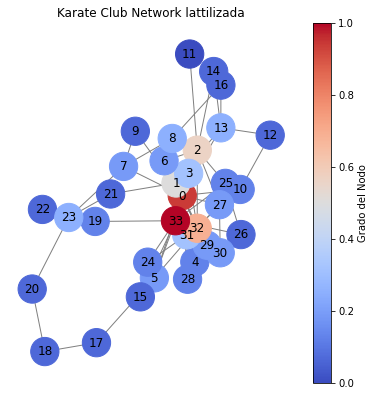

In [9]:
node_degrees = dict(G_l.degree())
degrees = np.array(list(node_degrees.values()))
min_degree = degrees.min()
max_degree = degrees.max()

normalized_degrees = (degrees - min_degree) / (max_degree - min_degree)

colors = plt.cm.coolwarm(normalized_degrees)


pos = nx.spring_layout(G_l)  # Posiciones de los nodos

plt.figure(figsize=(5, 5))
nx.draw(G_l, pos, node_color=colors, with_labels=True, node_size=800, cmap=plt.cm.coolwarm, edge_color='gray')
plt.title("Karate Club Network lattilizada")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")
plt.show()

# Vamos a ver la distribución de grado de una red real

In [10]:
fh = open("CA-AstroPh.txt", "rb")
G = nx.read_edgelist(fh)
fh.close()

print(G)

Graph with 18772 nodes and 198110 edges


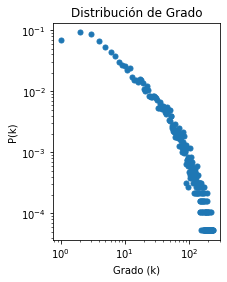

In [11]:
import numpy as np

degrees = [degree for node, degree in G.degree()]

degree_counts = {}
for degree in degrees:
    if degree in degree_counts:
        degree_counts[degree] += 1
    else:
        degree_counts[degree] = 1

sorted_degrees = sorted(degree_counts.items())

x, y = zip(*sorted_degrees)
p = [n / 18772 for n in y]

plt.figure(figsize=(3, 4))
plt.loglog(range(1, len(x) + 1), p, 'o', markersize=5)
plt.xlabel('Grado (k)')
plt.ylabel('P(k)')
plt.title('Distribución de Grado')
plt.show()

# Ajustamos una power law

In [12]:
from scipy import stats

log_k = np.log(range(1, len(x) + 1))
log_pk = np.log(p)

slope, intercept, r_value, p_value, std_err = stats.linregress(log_k, log_pk)

gamma = -slope
print(f'El exponente de la ley de potencias (γ) es aproximadamente: {gamma:.4f}')


El exponente de la ley de potencias (γ) es aproximadamente: 1.9443


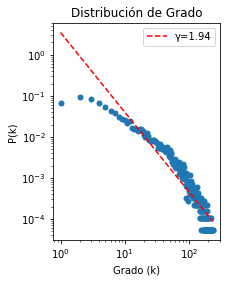

In [13]:
# Graficar la distribución de grado en una escala log-log
plt.figure(figsize=(3, 4))
plt.loglog(range(1, len(x) + 1), p, 'o', markersize=5)
plt.xlabel('Grado (k)')
plt.ylabel('P(k)')
plt.title('Distribución de Grado')

# Graficar la línea ajustada
plt.plot(np.exp(log_k), np.exp(intercept + slope * log_k), color='red', linestyle='--', label='γ=1.94')
plt.legend()
plt.show()

## Podemos calcular el coeficiente de determinación

In [14]:
# Coeficiente de determinación (R²), si es cercano a 1 tenemos un buen ajuste
r_squared = r_value**2
print(f"R²: {r_squared}")

R²: 0.886178280598067


## Podemos calcular el p-value

In [15]:
# p-value bajo (p-value < 0.05) sugiere una relación estadísticamente significativa
print(f"P-value: {p_value}")

P-value: 1.848612656384273e-111
